In [1]:
! pip install scikit-learn==1.0.2 pandas==1.4.1 seaborn==0.11.2 holidays==0.13 unidecode==1.3.3 python-Levenshtein==0.12.0

     |████████████████████████████████| 26.7 MB 6.4 MB/s eta 0:00:01    |█████▌                          | 4.6 MB 9.1 MB/s eta 0:00:03     |█████████████▌                  | 11.3 MB 3.4 MB/s eta 0:00:05
     |████████████████████████████████| 11.7 MB 89 kB/s  eta 0:00:01
     |████████████████████████████████| 292 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 235 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 739 kB/s eta 0:00:01
     |████████████████████████████████| 306 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 41.6 MB 29 kB/s  eta 0:00:01     |████████████████████████████    | 36.3 MB 2.7 MB/s eta 0:00:02
     |████████████████████████████████| 16.8 MB 3.1 MB/s eta 0:00:01     |██████████████████████████▍     | 13.9 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 

# Validations sur le réseau ferré

&#x26a0;&#xfe0f; le lien aux infos sur le jeu des données à l'adresse fourni ne marche pas, mais on peut trouver ces infos sur la [page du deuxieme semestre](https://data.iledefrance-mobilites.fr/explore/dataset/validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-2e-sem/information/) (https://eu.ftp.opendatasoft.com/stif/Validations/Donnees_de_validation.pdf).Neanmoins, certains des informations semblent etre en contraste avec les données comme presenté plus en bas.


## Explorations des données 

On commence en chargeant les données.

In [2]:
import pandas as pd

nom = 'validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-semestre-2015'

df = pd.read_csv(f'./data/{nom}.csv', sep=';')

Depuis la documentation, dans la table on trouve :

VARIABLES [FORMAT] DEFINITION
- JOUR : [Date (01/01/2015)] Jour d’exploitation (de 04:00 à 03:59 le lendemain)

- COD_STIF_TRNS [Numérique] Code Stif du transporteur

- COD_STIF_RES [Numérique] Code Stif du réseau

- COD_STIF_ARRET [Numérique] Code Stif de l’arrêt/station

- LIBELLE_ARRET [Caractère] Libellé de l’arrêt/station

- ID_REFA_LDA [Caractère] Identifiant arrêt référentiel STIF

- CATEGORIE_TITRE [Caractère] Titre de transport

- NB_VALD [Numérique] Nombre de validations (en entrée sur le réseau)
 
Exemples :

01/01/2015;100;110;1;PORTE MAILLOT; 71379; AMETHYSTE;117

01/01/2015;100;110;12;ECOLE VETERINAIRE DE MAISONS-ALFORT;70522;NAVIGO; 703

In [3]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596001 entries, 0 to 596000
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOUR             553745 non-null  object 
 1   CODE_STIF_TRNS   596001 non-null  int64  
 2   CODE_STIF_RES    553745 non-null  object 
 3   CODE_STIF_ARRET  553745 non-null  object 
 4   LIBELLE_ARRET    553745 non-null  object 
 5   ID_REFA_LDA      551667 non-null  float64
 6   CATEGORIE_TITRE  596001 non-null  object 
 7   NB_VALD          553745 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 36.4+ MB
None


,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,NaN,800,NaN,NaN,NaN,NaN,222,NaN
1,NaN,800,NaN,NaN,NaN,NaN,2220,NaN
2,NaN,800,NaN,NaN,NaN,NaN,2220,NaN
3,NaN,800,NaN,NaN,NaN,NaN,2220,NaN
4,NaN,800,NaN,NaN,NaN,NaN,2220,NaN
...,...,...,...,...,...,...,...,...
595996,2021-01-07,100,110,717,QUAI DE LA GARE,71597.0,FGT,113
595997,2021-01-07,100,110,717,QUAI DE LA GARE,71597.0,NON DEFINI,170
595998,2021-01-07,100,110,718,QUAI DE LA RAPEE,71637.0,TST,99
595999,2021-01-07,100,110,719,QUATRE SEPTEMBRE,71313.0,AMETHYSTE,39


On voit rapidement que, meme si le lien et le fichier indique 2015, les données sont du 2021.

### Données manquante

On voit deja que une partie de données est manquante. Si on a que CODE_STIF_TRNS et CATEGORIE_TITRE pour le moment on ne peut pas utiliser ces lignes, car on ne peut pas reconstruir ni le nombre de validation, ni la date ni dans quel station ont eu lieu. On decide donc de l'effacer.

In [4]:
df = df.dropna(subset=['JOUR', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
                       'LIBELLE_ARRET', 'ID_REFA_LDA', 'NB_VALD'], how='all').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553745 entries, 0 to 553744
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   JOUR             553745 non-null  object 
 1   CODE_STIF_TRNS   553745 non-null  int64  
 2   CODE_STIF_RES    553745 non-null  object 
 3   CODE_STIF_ARRET  553745 non-null  object 
 4   LIBELLE_ARRET    553745 non-null  object 
 5   ID_REFA_LDA      551667 non-null  float64
 6   CATEGORIE_TITRE  553745 non-null  object 
 7   NB_VALD          553745 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.8+ MB


In [5]:
df[df['ID_REFA_LDA'].isnull()]

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
462,2021-05-11,100,110,682,PORTE DAUPHINE,NaN,NAVIGO,2481
463,2021-05-11,100,110,682,PORTE DAUPHINE,NaN,NAVIGO JOUR,6
464,2021-05-11,100,110,682,PORTE DAUPHINE,NaN,NON DEFINI,428
1102,2021-05-12,100,110,682,PORTE DAUPHINE,NaN,FGT,135
1103,2021-05-12,100,110,682,PORTE DAUPHINE,NaN,NON DEFINI,376
...,...,...,...,...,...,...,...,...
552067,2021-01-04,100,ND,ND,Inconnu,NaN,?,10
552496,2021-01-05,100,110,682,PORTE DAUPHINE,NaN,AMETHYSTE,106
552497,2021-01-05,100,110,682,PORTE DAUPHINE,NaN,NON DEFINI,276
553085,2021-01-06,100,110,682,PORTE DAUPHINE,NaN,AMETHYSTE,108


Il reste donc que 2078 NaN dans une de colonne que pour le moment on garde.

### Type de colonnes

On voit que la colonne JOUR n'est pas une date et la colonne NB_VALD n'est pas numerique. 

Dans ce deuxieme cas on a en fait des valeurs 'Moins de 5' (entre 1 et 4, pour protection des données personnelles). Pour ne pas perdre ces infos on le transforme tous en 3 et on change le dtype en int.

In [6]:
df['JOUR'] = pd.to_datetime(df['JOUR'], dayfirst=False)

df.loc[df['NB_VALD'] == 'Moins de 5', 'NB_VALD'] = 3
df['NB_VALD'] = df['NB_VALD'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553745 entries, 0 to 553744
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   JOUR             553745 non-null  datetime64[ns]
 1   CODE_STIF_TRNS   553745 non-null  int64         
 2   CODE_STIF_RES    553745 non-null  object        
 3   CODE_STIF_ARRET  553745 non-null  object        
 4   LIBELLE_ARRET    553745 non-null  object        
 5   ID_REFA_LDA      551667 non-null  float64       
 6   CATEGORIE_TITRE  553745 non-null  object        
 7   NB_VALD          553745 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.8+ MB


### Reseaux et transporteur

Le réseau ferré sont defini dans la documentation comme "Transilien, RER, métro" et le réseau de surface comme
"bus, tram".

On trouve neanmoins 4 types differents de transporteur :

- 100 : aussi en regardant les examples dans la doc, semble se refire aux stations des lignes de metro.
- 800 : Grace à une recherche rapide on trouve que sont les arrets du tram T4.
- 810 : Sont de gare de RER, sur plusieurs lignes differents.
- 522 : Grace à une recherche rapide on trouve que sont les arrets du tram T9. Cela explique aussi pourquoi dans ce cas on a des données que d'après mai (ligne mise en service en avril).

Les données sont donc fortement limité et plutot differents de ceux decrits dans la documentation trouves : ils manquent presque tout les arrets de RER, on n'a pas d'info sur le ligne de Transilien comme L, H et J et on a deux lignes de tram mais pas les autres.

In [7]:
df.groupby(['CODE_STIF_TRNS'])['CODE_STIF_RES'].value_counts()

CODE_STIF_TRNS  CODE_STIF_RES
100             110              489606
                ND                  445
522             119                7404
                ND                    7
800             822               45330
                805                1185
                ND                    9
810             801                7798
                802                1961
Name: CODE_STIF_RES, dtype: int64

In [8]:
df[df['CODE_STIF_TRNS']==100].sort_values(by='JOUR').drop_duplicates(subset=['LIBELLE_ARRET'])

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
379527,2021-01-01,100,110,123,CAMBRONNE,71167.0,AUTRE TITRE,53
379725,2021-01-01,100,110,497,MAISON BLANCHE,70645.0,TST,54
379724,2021-01-01,100,110,496,MAIRIE D'IVRY,70488.0,NAVIGO,666
379721,2021-01-01,100,110,495,MAIRIE D'ISSY,70671.0,TST,77
379719,2021-01-01,100,110,494,MAIRIE DES LILAS,71909.0,NAVIGO JOUR,3
...,...,...,...,...,...,...,...,...
316129,2021-01-04,100,ND,ND,Inconnu,NaN,NON DEFINI,3
498689,2021-01-12,100,110,641,PICPUS,71639.0,AUTRE TITRE,48
365228,2021-01-13,100,110,414,LA DEFENSE-GRANDE ARCHE,71517.0,NON DEFINI,338
48257,2021-01-19,100,110,689,PTE DE CLICHY,71545.0,NAVIGO,3


In [9]:
# 801 RATP 802 SNCF
df[df['CODE_STIF_TRNS']==810].sort_values(by='JOUR').drop_duplicates(subset=['LIBELLE_ARRET'])

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
380081,2021-01-01,810,801,582,NATION,71673.0,?,5
138365,2021-01-01,810,801,32,AUBER,73792.0,TST,59
138367,2021-01-01,810,801,393,LA DEFENSE-GRANDE ARCHE,71517.0,NAVIGO JOUR,7
380084,2021-01-01,810,802,827,SAINT-MICHEL NOTRE DAME,73620.0,NON DEFINI,28
380072,2021-01-01,810,801,163,CHATELET-LES HALLES,73794.0,NAVIGO JOUR,13
550271,2021-01-01,810,802,37,AULNAY-SOUS-BOIS,72646.0,NON DEFINI,3
550265,2021-01-01,810,801,306,GARE DE LYON,73626.0,NON DEFINI,438


In [10]:
f"Données entre {min(df[df['CODE_STIF_TRNS']==800]['JOUR'])}"

'Données entre 2021-01-01 00:00:00'

In [11]:
print(f"Données entre {df[df['CODE_STIF_TRNS']==800]['JOUR'].min()} et {df[df['CODE_STIF_TRNS']==800]['JOUR'].max()}")
df[df['CODE_STIF_TRNS']==800].sort_values(by='JOUR').drop_duplicates(subset=['LIBELLE_ARRET'])

Données entre 2021-01-01 00:00:00 et 2021-06-30 00:00:00


,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
550254,2021-01-01,800,822,2218,NOTRE-DAME-DES-ANGES,2218.0,FGT,3
138249,2021-01-01,800,822,2106,GARGAN,2106.0,NON DEFINI,56
138251,2021-01-01,800,822,2107,LYCEE HENRI SELLIER,2107.0,TST,11
138253,2021-01-01,800,822,2108,L'ABBAYE,2108.0,IMAGINE R,12
138257,2021-01-01,800,822,2109,FREINVILLE-SEVRAN,2109.0,AMETHYSTE,7
138261,2021-01-01,800,822,2111,AULNAY-SOUS-BOIS,2111.0,AMETHYSTE,7
138247,2021-01-01,800,822,2105,LES PAVILLONS-SOUS-BOIS,2105.0,TST,7
138265,2021-01-01,800,822,2112,REPUBLIQUE-MARX DORMOY,2112.0,TST,8
138269,2021-01-01,800,822,2113,LEON BLUM,2113.0,NAVIGO,12
138275,2021-01-01,800,822,2114,MAURICE AUDIN,2114.0,AMETHYSTE,3


In [12]:
print(f"Données entre {df[df['CODE_STIF_TRNS']==522]['JOUR'].min()} et {df[df['CODE_STIF_TRNS']==522]['JOUR'].max()}")
df[df['CODE_STIF_TRNS']==522].sort_values(by='JOUR').drop_duplicates(subset=['LIBELLE_ARRET'])

Données entre 2021-05-31 00:00:00 et 2021-06-30 00:00:00


,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
405448,2021-05-31,522,119,000004,Châteaudun - Barbès,4.0,NAVIGO,3
472656,2021-05-31,522,119,000008,Beethoven - Concorde,8.0,NON DEFINI,3
472655,2021-05-31,522,119,000006,La Briqueterie,6.0,FGT,3
472654,2021-05-31,522,119,000003,Porte de Choisy,3.0,TST,3
405449,2021-05-31,522,119,000029,Rouget de Lisle,29.0,NAVIGO,3
99965,2021-05-31,522,119,000034,Camille Groult,34.0,NON DEFINI,3
7013,2021-05-31,522,119,000009,Musée MAC-VAL,9.0,TST,3
7012,2021-05-31,522,119,000007,Germaine Tailleferre,7.0,IMAGINE R,3
7011,2021-05-31,522,119,000005,Cimetière P. d'Ivry,5.0,IMAGINE R,3
99963,2021-05-31,522,119,000012,Constant Coquelin,12.0,NAVIGO,3


### Arrets et stations

Des stations avec le meme code transporteur, reseau et arret devraient avoir la meme libelle. C'est toujours bien le cas, sauf pour l'arret 689. C'est la station de porte de clichy, avec porte ecrit dans deux facons differents. 

In [13]:
print(df.groupby(['CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET'])['LIBELLE_ARRET']
        .nunique().sort_values(ascending=False))

df[df['CODE_STIF_ARRET']=='689']

CODE_STIF_TRNS  CODE_STIF_RES  CODE_STIF_ARRET
100             110            689                2
                               1                  1
                               780                1
                               808                1
                               803                1
                                                 ..
                               476                1
                               47                 1
                               467                1
                               466                1
810             802            827                1
Name: LIBELLE_ARRET, Length: 404, dtype: int64


,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
475,2021-05-11,100,110,689,PTE DE CLICHY,71545.0,?,160
476,2021-05-11,100,110,689,PTE DE CLICHY,71545.0,IMAGINE R,1586
477,2021-05-11,100,110,689,PTE DE CLICHY,71545.0,NON DEFINI,700
1112,2021-05-12,100,110,689,PORTE DE CLICHY,71545.0,?,42
1113,2021-05-12,100,110,689,PORTE DE CLICHY,71545.0,AUTRE TITRE,86
...,...,...,...,...,...,...,...,...
553100,2021-01-06,100,110,689,PORTE DE CLICHY,71545.0,NAVIGO,4320
553101,2021-01-06,100,110,689,PORTE DE CLICHY,71545.0,NAVIGO JOUR,10
553699,2021-01-07,100,110,689,PORTE DE CLICHY,71545.0,AMETHYSTE,227
553700,2021-01-07,100,110,689,PORTE DE CLICHY,71545.0,AUTRE TITRE,179


Etant les autres identifiants identique, on uniforme les libelles, en sommant aussi les validations de la meme categorie sur le meme jour.

In [14]:
df.loc[(df['CODE_STIF_ARRET']=='689') & (df['LIBELLE_ARRET']=='PTE DE CLICHY'), 
       'LIBELLE_ARRET'] = 'PORTE DE CLICHY'

sumdf = df[df['CODE_STIF_ARRET']=='689'].groupby(['JOUR', 'CODE_STIF_TRNS', 'CODE_STIF_RES', 'CODE_STIF_ARRET',
                                                  'LIBELLE_ARRET', 'ID_REFA_LDA', 
                                                  'CATEGORIE_TITRE'])['NB_VALD'].sum().reset_index()

df = pd.concat([df[df['CODE_STIF_ARRET']!='689'], sumdf]).sort_values(by='JOUR').reset_index(drop=True)

On trouve aussi des libellés associés à plusieurs codes arrêt. C'est le cas des trams, où le billet est validé une fois monté à bord. Donc on peut imaginer que deux codes sont liés aux deux sens de marche. Ca n'explique pas les 6 codes différents de Gargan et Bondy, mais, par manque d'informations, on les garde séparés.

In [15]:
pd.set_option('display.max_rows', 360)
df.groupby(['CODE_STIF_TRNS', 'CODE_STIF_RES', 'LIBELLE_ARRET'])['CODE_STIF_ARRET'].nunique().sort_values(ascending=False)

CODE_STIF_TRNS  CODE_STIF_RES  LIBELLE_ARRET                          
800             822            GARGAN                                     6
                               BONDY                                      5
                               CLICHY-MONTFERMEIL                         2
                               AULNAY-SOUS-BOIS                           2
                               ARBORETUM                                  2
522             119            Watteau - Rondenay                         2
                               Verdun - Hoche                             2
                               Trois Communes                             2
                               Rouget de Lisle                            2
                               Porte de Choisy                            2
                               Orly - Gaston Viens                        2
                               Mairie de Vitry/Sein                       2
                 


# 1. Quelles sont les 20 premières stations en terme de validations ?

Si on considere le volume totale de validations, divisee par transporteur et code d'arret on trouve que le stations sont :

In [16]:
df.groupby(['CODE_STIF_ARRET', 
            'LIBELLE_ARRET', 
            'CODE_STIF_TRNS'])['NB_VALD'].sum().sort_values(ascending=False).iloc[:20]

CODE_STIF_ARRET  LIBELLE_ARRET                          CODE_STIF_TRNS
769              SAINT-LAZARE                           100               9434391
562              MONTPARNASSE                           100               5216901
313              GARE DE L'EST                          100               5204207
729              REPUBLIQUE                             100               3694303
460              LES HALLES                             100               3548069
163              CHATELET-LES HALLES                    810               3433441
60               BELLEVILLE                             100               2779514
79               BOBIGNY-PABLO PICASSO                  100               2674467
54               BASTILLE                               100               2539280
492              MAIRIE DE MONTREUIL                    100               2500303
162              CHATEAU ROUGE                          100               2461911
652              PLACE D'IT

Il faut noter que :

1. Les stations de tram sont séparés en aller-retour (et plus).
2. Le tram T9 ne couvre pas toute la plage de date.
3. Certains arrêts peuvent être ferme dans certains jours (travaux, manifestations, etc.)

On ne change rien pour le premier point. En revanche, pour avoir une idée plus claire des arrêts plus fréquents, on adresse le deuxième et troisième points en calculant la moyenne d'entree par jour d'ouverture.

In [17]:
val_jour = df.groupby(['CODE_STIF_ARRET', 
            'LIBELLE_ARRET', 
            'CODE_STIF_TRNS']).agg({'NB_VALD': 'sum', 'JOUR': 'nunique'}).reset_index()

val_jour['Moyenne'] = val_jour['NB_VALD'] / val_jour['JOUR']

data_plot = val_jour.sort_values(by='Moyenne', ascending=False).iloc[:20]
data_plot

,CODE_STIF_ARRET,LIBELLE_ARRET,CODE_STIF_TRNS,NB_VALD,JOUR,Moyenne
352,769,SAINT-LAZARE,100,9434391,181,52123.707182
257,562,MONTPARNASSE,100,5216901,181,28822.657459
179,313,GARE DE L'EST,100,5204207,181,28752.524862
329,729,REPUBLIQUE,100,3694303,181,20410.513812
219,460,LES HALLES,100,3548069,181,19602.591160
79,163,CHATELET-LES HALLES,810,3433441,181,18969.287293
263,60,BELLEVILLE,100,2779514,181,15356.430939
362,79,BOBIGNY-PABLO PICASSO,100,2674467,181,14776.060773
249,54,BASTILLE,100,2539280,181,14029.171271
232,492,MAIRIE DE MONTREUIL,100,2500303,181,13813.828729


Le resultat est identique à celle trouvée avant.

# Proposez une illustration graphique de ce classement ?



''

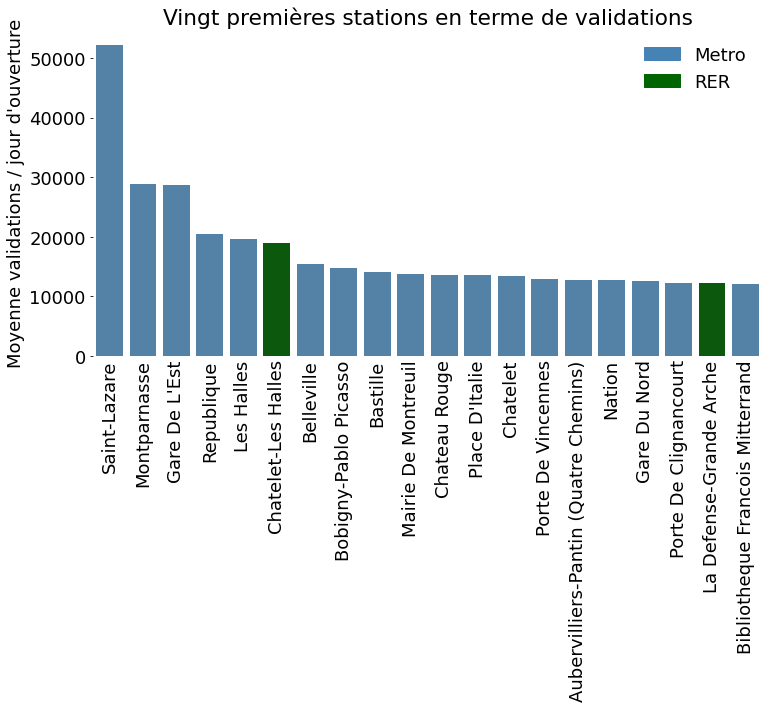

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams.update({'font.size': 18})

custom_palette = {}
for i in data_plot['LIBELLE_ARRET'].unique():
    if data_plot[data_plot['LIBELLE_ARRET']==i]['CODE_STIF_TRNS'].iloc[0] == 100:
        custom_palette[i] = 'steelblue'
    elif data_plot[data_plot['LIBELLE_ARRET']==i]['CODE_STIF_TRNS'].iloc[0] == 810:
        custom_palette[i] = 'darkgreen'

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x="LIBELLE_ARRET", y="Moyenne", data=data_plot, ax=ax, palette=custom_palette)

ax.set_xticklabels([x.get_text().title() for x in ax.get_xticklabels()], rotation=90)
ax.xaxis.set_tick_params(length=0)

for i in ax.spines:
    ax.spines[i].set_visible(False)


ax.set_xlabel('')
ax.set_ylabel('Moyenne validations / jour d\'ouverture')

ax.set_title('Vingt premières stations en terme de validations')

ax.legend(handles=[mpatches.Patch(color='steelblue', label='Metro'),
                   mpatches.Patch(color='darkgreen', label='RER')], frameon=False)

;

En ayant accès à des données de géolocalisation des stations (ou au moins à ses adresses pour pouvoir utiliser un API comme https://adresse.data.gouv.fr/) on pourrait faire de la cartographie avec, par exemple, une des bulles de taille proportionnelle au numéro de validation et couleur liés au transporteur, centrés sur la position de la station. Ces types des données sont disponibles dans des autres bases aux même adresses.


# Proposez une classification des arrêts en vous basant sur le nombre de validations par titre de transport ?

En première on regarde le type de titre. Dans la doc on trouve :

- « IMAGINE R » : regroupe les forfaits annuels Imagine R Scolaire et Imagine R Etudiant, forfaits
réservés aux élèves, apprentis et étudiants qui permet de voyager à volonté toute l’année et dans
toute l'Ile-de-France.

- « NAVIGO » : regroupe les forfaits Navigo Annuel, Navigo Mois et Navigo Semaine.

- « AMETHYSTE » : comptabilise les forfaits Améthyste : forfait réservé aux personnes âgées ou
handicapées sous conditions de ressources ou de statut, et résidant en Île-de-France. Ce forfait
annuel permet à son bénéficiaire de se déplacer de manière illimitée sur tous les modes de
transport à l'intérieur des zones de validité.

- « TST » : regroupe les forfaits hebdomadaires et mensuels à tarif réduit, accordé aux bénéficiaires
de la Réduction Solidarité Transport, pour voyager à l’intérieur des zones choisies sur tous les
modes de transport en Île-de-France.

- « FGT » : comptabilise les Forfaits Navigo Gratuité Transport, forfait qui permet à certain
bénéficiaire d’aides sociales de voyager gratuitement dans toute l’Île-de-France.

- « AUTRE TITRE » : comptabilise les forfaits spéciaux.

- « NON DEFINI » : comptabilise les validations dont le type de titre n’est pas défini (anomalies).

En plus, on trouve '?' (qu'on ne sait pas si sont des "autre titre" ou de "non defini" et donc on garde par séparé) et 'NAVIGO JOUR' (probablement des forfait à la journée).

Les validations sont plutôt bien distribués sur les différentes catégories.

In [19]:
df['CATEGORIE_TITRE'].value_counts(normalize=True)

NAVIGO         0.116077
IMAGINE R      0.115724
FGT            0.115579
TST            0.114974
NON DEFINI     0.114351
AMETHYSTE      0.113307
AUTRE TITRE    0.110905
?              0.106268
NAVIGO JOUR    0.092815
Name: CATEGORIE_TITRE, dtype: float64

On cherche à définir de typologie d'arrêt en se basant sur la distribution d'une station par respect a l'ensemble des stations du même type de transporteur (et pas sur des valeurs calculées sur station par station stations) car on imagine de distributions différentes entre trams, métro et RER.

On exclude directement les arrêts avec code ND car on ne sait pas s'ils arrivent de plusieurs stations ou d'une seule.

In [20]:
maskND = ~df['CODE_STIF_ARRET'].str.contains('ND')

val_cat = df[maskND].groupby(['CODE_STIF_ARRET', 
                              'LIBELLE_ARRET', 
                              'CODE_STIF_TRNS', 
                              'CATEGORIE_TITRE'])['NB_VALD'].sum()\
                                                            .div(df[maskND].groupby(['CODE_STIF_TRNS'])['NB_VALD']\
                                                                           .sum()).reset_index()

for i in val_cat['CATEGORIE_TITRE'].unique():
    val_cat.loc[val_cat['CATEGORIE_TITRE']==i, i] = val_cat.loc[val_cat['CATEGORIE_TITRE']==i, 'NB_VALD']

print('Valeurs sur toute la table :\n', val_cat['NB_VALD'].describe(), '\n')
val_cat = val_cat.drop(columns=['CATEGORIE_TITRE', 'NB_VALD'])

# On est obligé à utiliser l'apply pour ne perdre pas la colonne CODE_STIF_ARRET
val_cat = val_cat.groupby('CODE_STIF_ARRET')\
                 .apply(lambda df: df.fillna(method='ffill').fillna(method='bfill'))\
                 .drop_duplicates().fillna(0)

print('Valeurs categorie par categorie :\n', val_cat.drop(columns=['CODE_STIF_TRNS']).describe())

col_cat = ['?', 'AUTRE TITRE', 'FGT', 'IMAGINE R', 'NAVIGO', 'NAVIGO JOUR', 'NON DEFINI', 'TST', 'AMETHYSTE']

Valeurs sur toute la table :
 count    3.528000e+03
mean     1.133787e-03
std      6.326223e-03
min      3.870393e-07
25%      4.735112e-05
50%      1.495593e-04
75%      6.076509e-04
max      2.177655e-01
Name: NB_VALD, dtype: float64 

Valeurs categorie par categorie :
                 ?  AUTRE TITRE         FGT   IMAGINE R      NAVIGO  \
count  421.000000   421.000000  421.000000  421.000000  421.000000   
mean     0.000087     0.000289    0.000851    0.001558    0.004923   
std      0.000490     0.000852    0.002202    0.004730    0.016684   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.000016     0.000091    0.000061    0.000353    0.001015   
50%      0.000026     0.000137    0.000121    0.000550    0.001596   
75%      0.000053     0.000214    0.000329    0.000959    0.002898   
max      0.007790     0.013876    0.022294    0.065498    0.217765   

       NAVIGO JOUR  NON DEFINI         TST   AMETHYSTE  
count   421.000000  421.000000  421.000

Pour trouver le nombre optimal de cluster on va regarder la valeur de l'inertia sur une plage de nombres. Il y a un "cou" dans le graphique de l'inertia pour 3 clusters, valeur qu'on va utiliser dans la suite.

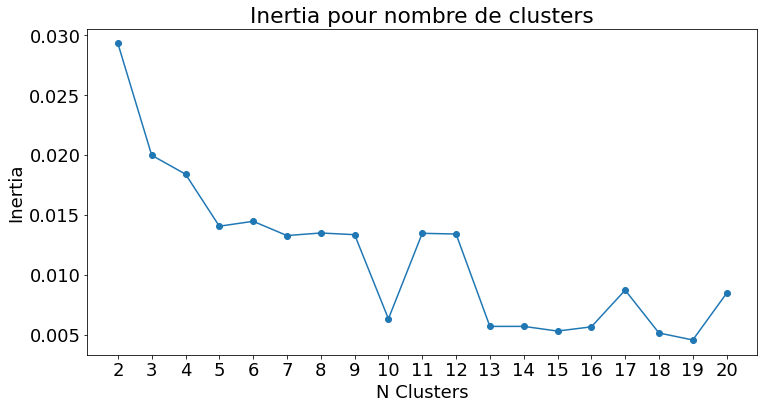

In [21]:
from sklearn.cluster import MiniBatchKMeans

def inertia_clusters(data, max_k):
    trials = []
    for k in range(2, max_k+1):
        trials.append(MiniBatchKMeans(n_clusters=k, random_state=42).fit(data).inertia_)
        
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(range(2, max_k+1), trials, marker='o')
    ax.set_xlabel('N Clusters')
    ax.set_xticks(range(2, max_k+1))
    ax.set_xticklabels(range(2, max_k+1))
    
    ax.set_ylabel('Inertia')
    ax.set_title(r'Inertia pour nombre de clusters')

max_k=20
inertia_clusters(val_cat[col_cat], max_k)

<AxesSubplot:xlabel='NAVIGO', ylabel='FGT'>

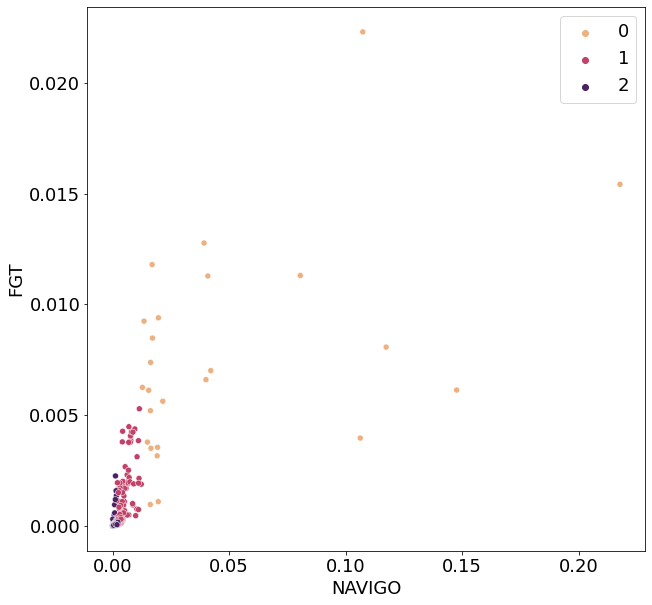

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

kmeans = MiniBatchKMeans(n_clusters=3, random_state=15)
kmeans.fit(val_cat[col_cat])
cl_labels = kmeans.predict(val_cat[col_cat])

sns.scatterplot(data=val_cat, x="NAVIGO", ax=ax, y="FGT", hue=cl_labels, 
                palette=sns.color_palette("flare", as_cmap=True))

Il semble que les clusters trouvés sont simplement des plages différentes sur NAVIGO (la catégorie plus représenté dans les données).

On pourrait aussi essayer de diminuer les dimensions avec par exemple de l'analyse de composantes principales (PCA) pour voir si les clusters sont plus évidents, ou different algorithmes de clustering comme DBSCAN.

On pourrait aussi normaliser les données station par station. L'idée dans ce cas serait de voir si on peut définir de profil de stations tel que 'Scolaire' si avec une majorité de Imagine R ou 'Retraite' si avec une majorité de 'AMETHYSTE', indépendamment du nombre totale de personnes qui passe par cette station.

# Quelles prédictions pouvez-vous faire pour le nombre de validations dans les stations "OLYMPIADES" et "MONTROUGE" sur la période du 24 au 30 juin et les comparer par rapport à la réalité ?

La station 'Montrouge' n'est pas dans le jeu des données. On a que 'CHATILLON-MONTROUGE' et 'M. MONTROUGE'. Je vais considérer ce deuxième.

On soupçonne de vouloir créer deux modèles séparés pour les deux stations et pas un seul modèle entraine sur toutes les stations à notre disposition à jouer sur ces deux arrêts.

On va faire des previsions sur le nombre de validations totale par jour, toutes catégories des titres confondues. Les modèles qu'on va entrainer nous donneront la prévision à J+7 en se basant sur l'observation d'aujourd'hui. Donc pour prévoir la période du 24 au 30 on utilisera la période du 17 au 23. 
On pourrait aussi utiliser d'autre approche, comme prévoir directement les 7 jours en sortie, changer le lag, utiliser de modèle comme Prophet de Facebook qui donnes de previsions pour tous les jours en future, etc...


On voit de trends similaires pour les deux stations et une forte saisonnalité hebdomadaire. En plus, on aperçoit une saisonnalité annuelle mais, ayant seulement 6 mois des données, on ne réussira pas à la modeler.

Il y a aussi des jours avec un nombre de validations extremament faible (voir 12/13 juin pour Olympiades, dû à des travaux https://prolongementligne14-orly.fr/actualites/fermeture-de-la-ligne-14-les-samedi-12-et-dimanche-13-juin-2021-1768 ou plusieurs jours pour Montrouge, aussi dû à des travaux https://www.iledefrance-mobilites.fr/travaux-d-ete-2021-sur-le-reseau-metro).

Text(0.5, 1.0, 'Series temporelle de nombre de validations dans deux stations')

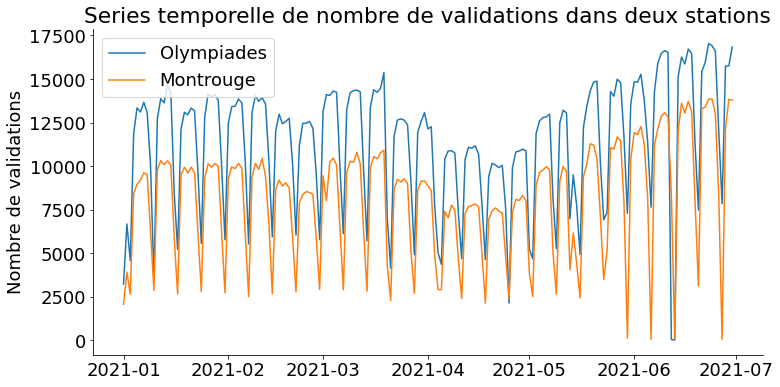

In [23]:
ol = df[df['LIBELLE_ARRET']=='OLYMPIADES'].groupby(['JOUR'])['NB_VALD'].sum().reset_index()

mr = df[df['LIBELLE_ARRET']=='M. MONTROUGE'].groupby(['JOUR'])['NB_VALD'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=ol, x="JOUR", y="NB_VALD", ax=ax, label='Olympiades')
sns.lineplot(data=mr, x="JOUR", y="NB_VALD", ax=ax, label='Montrouge')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('')
ax.set_ylabel('Nombre de validations')

ax.set_title('Series temporelle de nombre de validations dans deux stations')


In [24]:
if len(ol)==len(mr)==181:
    print('On a des valeurs pour chaque jour dans la plage de date')
else:
    print('Il y a des trous dans les données')

On a des valeurs pour chaque jour dans la plage de date


Comme feature principale on utilisera le jour de la semaine. Pour simplicité on utilise des chiffres. On peut le changer avec un one-hot encoding pour éviter de faire assomptions sur l'ordre des chiffres. En revanche, pour maintenir l'information concernant la cyclicité des jours on peut changer les chiffres avec, par exemple, des fonctions trigonométriques.

In [25]:
import datetime
import holidays
def create_feat(data):
    # Lundi == 0, Mardi==1, etc...
    data.loc[:, 'weekday'] = data['JOUR'].dt.weekday
    fr_hol = list(holidays.France(years=2021).keys())
    data.loc[:, 'holiday'] = data['JOUR'].isin(fr_hol).astype(int)
    return data


splitdate = pd.to_datetime('2021-06-17')
lag = 7

X_ol = create_feat(ol)
X_mr = create_feat(mr)


X_train_ol = X_ol[X_ol['JOUR'] < splitdate].drop(columns=['JOUR'])
y_train_ol = ol[ol['JOUR'] < splitdate + datetime.timedelta(days=lag)]['NB_VALD'].shift(-lag).dropna()

X_test_ol = X_ol[X_ol['JOUR'] >= splitdate].drop(columns=['JOUR']).iloc[:-lag]
y_test_ol = ol[ol['JOUR'] >= splitdate + datetime.timedelta(days=lag)]['NB_VALD'].dropna()

X_train_mr = X_mr[X_mr['JOUR'] < splitdate].drop(columns=['JOUR'])
y_train_mr = mr[mr['JOUR'] < splitdate + datetime.timedelta(days=lag)]['NB_VALD'].shift(-lag).dropna()

X_test_mr = X_mr[X_mr['JOUR'] >= splitdate].drop(columns=['JOUR']).iloc[:-lag]
y_test_mr = mr[mr['JOUR'] >= splitdate + datetime.timedelta(days=lag)]['NB_VALD'].dropna()

### Modèles

On va entrainer un modèle linéaire et une Random Forest regressor, plus un modèle Naïf (où on prend juste la valeur d'aujourd'hui et on l'utilise pour la semaine prochaine). Pour chaque modèle on utilise un grid search (petite, pour minimiser le temps de computation) pour optimiser les hyperparametres, avec une validation croisée spécifique pour les series temporelles pour éviter le shuffle.

Clairement beaucoup d'autres modèles différents pourront être essayés. On utilise un MinMaxScaler mais on pourrait essayer aussi avec un scaler Standard ou Robust.

#### Olympiades

In [30]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

tscv = TimeSeriesSplit(n_splits=10,gap=0)

In [27]:
print('Naïf')
y_pred = X_train_ol['NB_VALD']

mse = mean_squared_error(y_train_ol, y_pred)

print('Mean Squared Error: {}'.format(mse))

Naïf
Mean Squared Error: 5724277.143712575


In [31]:
'''# Commenté pour eviter le re-run à chaque fois
en = ElasticNet(random_state=42)

enpipe = Pipeline([('scaler', MinMaxScaler()), ('elastic', en)])

param_grid = {'elastic__alpha': [1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0],
             'elastic__l1_ratio': np.arange(0, 1, 0.1)}

# Definition de la gridsearch
search = GridSearchCV(enpipe, param_grid, scoring='neg_mean_squared_error', cv=tscv, n_jobs=-1)

results = search.fit(X_train_ol, y_train_ol)

print('MSE: {}'.format(-results.best_score_))
print('Config: {}'.format(results.best_params_))

MSE: 4608728.096339518
Config: {'elastic__alpha': 0.01, 'elastic__l1_ratio': 0.4}
''';

In [32]:
print('Modele lineaire : Elastic Net')
enbest = Pipeline([('scaler', MinMaxScaler()),
                   ('elastic', ElasticNet(random_state=42, alpha=0.01, l1_ratio=0.4))])


enbest.fit(X_train_ol, y_train_ol)

cv_results = cross_validate(
        enbest,
        X_train_ol,
        y_train_ol,
        cv=tscv,
        scoring=["neg_mean_squared_error"],
    )
mse = -cv_results["test_neg_mean_squared_error"]

print('Mean Squared Error:     {:.3f} +/- {:.3f}\n'.format(mse.mean(), mse.std()))

Modele lineaire : Elastic Net
Mean Squared Error:     4608728.096 +/- 6008668.771



In [33]:
'''
rf = RandomForestRegressor(n_jobs=-1, bootstrap=True)

enpipe = Pipeline([('scaler', MinMaxScaler()), ('RanFor', rf)])

param_grid = {'RanFor__max_depth': [10, 50, 100],  'RanFor__max_features': ['auto', 'sqrt'],
              'RanFor__n_estimators': [100, 200]}

search = GridSearchCV(enpipe, param_grid, scoring='neg_mean_squared_error', cv=tscv, n_jobs=-1)

results = search.fit(X_train_ol, y_train_ol)

print('MSE: {:.3f}'.format(-results.best_score_))
print('Config: {}'.format(results.best_params_))

MSE: 4158394.611
Config: {'RanFor__max_depth': 10, 'RanFor__max_features': 'sqrt', 'RanFor__n_estimators': 200}''';

In [34]:
print('Random Forest')
rfbest_ol = Pipeline([('scaler', MinMaxScaler()),
                   ('RanFor', RandomForestRegressor(n_jobs=-1, bootstrap=True,
                                                    max_depth=10, max_features='sqrt',
                                                    n_estimators=200))])

rfbest_ol.fit(X_train_ol, y_train_ol)

cv_results = cross_validate(
        rfbest_ol,
        X_train_ol,
        y_train_ol,
        cv=tscv,
        scoring=["neg_mean_squared_error"],
    )
mse = -cv_results["test_neg_mean_squared_error"]

print('Mean Squared Error:     {:.3f} +/- {:.3f}\n'.format(mse.mean(), mse.std()))

Random Forest
Mean Squared Error:     4216283.970 +/- 4851913.735



#### Montrouge

Pour rapidité, on ne re-optimize pas les hyperparametres.

In [36]:
print('Naive - Mean Squared Error : {}'.format(mean_squared_error(y_train_mr, X_train_mr['NB_VALD'])))

enbest_mr = Pipeline([('scaler', MinMaxScaler()),
                   ('elastic', ElasticNet(random_state=42, alpha=0.01, l1_ratio=0.4))])


enbest_mr.fit(X_train_mr, y_train_mr)

cv_results = cross_validate(enbest_mr, X_train_mr, y_train_mr, cv=tscv,
                            scoring=["neg_mean_squared_error"])

print('Elastic Net - Mean Squared Error: {:.3f} +/- {:.3f}\n'.format(-cv_results["test_neg_mean_squared_error"].mean(), 
                                                               -cv_results["test_neg_mean_squared_error"].std()))

rfbest_mr = Pipeline([('scaler', MinMaxScaler()),
                   ('RanFor', RandomForestRegressor(n_jobs=-1, bootstrap=True,
                                                    max_depth=10, max_features='sqrt',
                                                    n_estimators=200))])

rfbest_mr.fit(X_train_mr, y_train_mr)

cv_results = cross_validate(rfbest_mr, X_train_mr, y_train_mr, cv=tscv, scoring=["neg_mean_squared_error"])
mse = -cv_results["test_neg_mean_squared_error"]

print('Random Forest - Mean Squared Error: {:.3f} +/- {:.3f}\n'.format(mse.mean(), mse.std()))

Naive - Mean Squared Error : 2411702.011976048
Elastic Net - Mean Squared Error: 2203172.749 +/- -1998196.549

Random Forest - Mean Squared Error: 2231319.603 +/- 2038474.527



#### Résultats

Il n'y a pas grande différence entre les different modèles pour les deux lignes. On utilise dans tout cas celle avec le meilleur MSE : Elastic Net pour Montrouge et Random Forest pour Olympiades

''

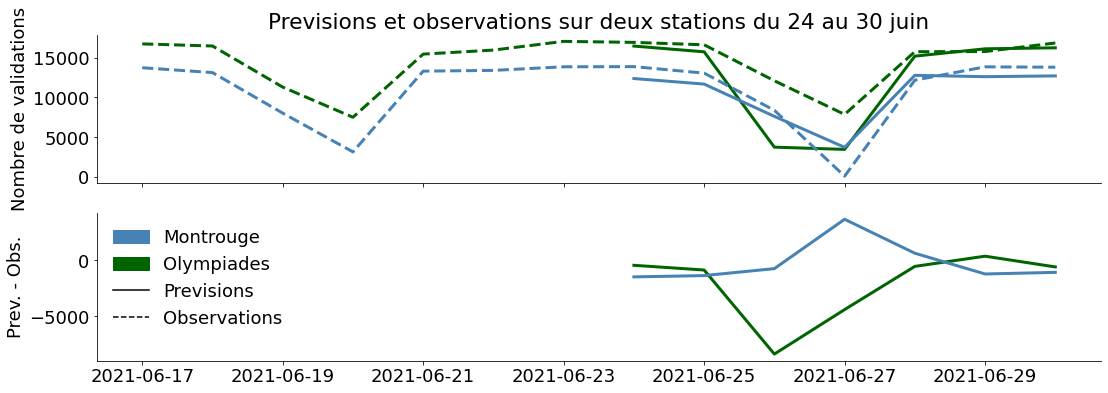

In [40]:
from matplotlib.lines import Line2D
rfbest_ol.predict(X_test_ol), y_test_ol

fig, (ax, ax1) = plt.subplots(nrows=2, figsize=(18, 6), sharex=True)
dates = pd.date_range(start=splitdate, periods=14)

sns.lineplot(x=dates[7:], y=rfbest_ol.predict(X_test_ol), ax=ax,
            color='darkgreen', linewidth=3)
sns.lineplot(x=dates, y=ol[ol['JOUR'] >= splitdate]['NB_VALD'], ax=ax, linestyle='--',
            color='darkgreen', linewidth=3)

sns.lineplot(x=dates[7:], y=rfbest_ol.predict(X_test_ol)-y_test_ol, ax=ax1,
            color='darkgreen', linewidth=3)

sns.lineplot(x=dates[7:], y=enbest_mr.predict(X_test_mr), ax=ax,
            color='steelblue', linewidth=3)
sns.lineplot(x=dates, y=mr[mr['JOUR'] >= splitdate]['NB_VALD'], ax=ax, linestyle='--',
            color='steelblue', linewidth=3)

sns.lineplot(x=dates[7:], y=enbest_mr.predict(X_test_mr)-y_test_mr, ax=ax1,
            color='steelblue', linewidth=3)

ax.set_xticks(dates[::2])
ax.set_xticklabels([x.date() for x in dates[::2]], rotation=45)

ax1.set_ylabel('Prev. - Obs.')
ax.set_ylabel('Nombre de validations')
ax.set_title('Previsions et observations sur deux stations du 24 au 30 juin')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.legend(handles=[mpatches.Patch(color='steelblue', label='Montrouge'),
                   mpatches.Patch(color='darkgreen', label='Olympiades'),
                  Line2D([0], [0],color='k', label='Previsions'),
                  Line2D([0], [0],color='k', linestyle='--', label='Observations')], frameon=False)

;

On trouve les erreurs plus grand les 26 et 27 juin (samedi et dimanche). Si on retourne à la série complète en haut, on voit clairement que les samedis et dimanche on a beaucoup de variabilité due à des travaux.

Pour améliorer ces previsions on peut ajouter d'autres données externes, par exemple le calendrier des travaux de différentes lignes (aussi des lignes qui partagent la même station), des vacances scolaires, des grèves et grandes manifestations ou des données météo (comme pluie et température externe). En ayant accès à plus d'historique on pourrait ajouter comme feature aussi le mois, la semaine de l'année, etc...

# Trouver 10 paires de stations dont les noms sont proches.

On prend tous les noms uniques dans les libelles d'arrêt. On considère que les libelles et pas les codes d'arrêt car on sait déjà que certains fois à une même station sont associés plusieurs codes (E.g.les trams)

On peut définir plusieurs types de distance. On commence avec une simple répétition de mots dans deux ou plusieurs noms. On efface tous les stopwords, comme les articles, pas trop intéressant d'un point de vue statistique, et on divise les arrêts en mots en utilisant tout ce qui n'est pas une lettre.

Je define la liste de stopwords a la main car dans ce cas ils ne sont pas beaucoup et pour pas devoir installer un paquet comme spacy seulement pour l'obtenir.

In [38]:
import re
import unidecode

stopwords = ['la', 'le', 'les', 'l', 'de', 'des', 'd', 'et', 'du']

# On uniforme la case
allnoms = list(set([x.lower() for x in df['LIBELLE_ARRET'].unique()]))

# On divise chaque nom de station en mots
clean_noms = []
for i in [re.split(r'\W', x) for x in allnoms]:
    clean_noms.append([x for x in i if len(x)>0 and x not in stopwords])
clean_noms

[['botzaris'],
 ['berault'],
 ['mirabeau'],
 ['maubert', 'mutualite'],
 ['bibliotheque', 'francois', 'mitterrand'],
 ['chateau', 'landon'],
 ['poissonniere'],
 ['boucicaut'],
 ['buzenval'],
 ['chaussee', 'antin', 'fayette'],
 ['simplon'],
 ['porte', 'saint', 'ouen'],
 ['charenton', 'ecoles'],
 ['lourmel'],
 ['remise', 'a', 'jorelle'],
 ['peletier'],
 ['couronnes'],
 ['clichy', 'st', 'ouen'],
 ['pre', 'saint', 'gervais'],
 ['falguiere'],
 ['chevaleret'],
 ['fourche'],
 ['rue', 'bac'],
 ['quai', 'gare'],
 ['pyramides'],
 ['censier', 'daubenton'],
 ['reaumur', 'sebastopol'],
 ['nationale'],
 ['concorde'],
 ['porte', 'charenton'],
 ['aubervilliers', 'pantin', 'quatre', 'chemins'],
 ['republique'],
 ['richelieu', 'drouot'],
 ['corentin', 'celton'],
 ['muette'],
 ['saint', 'marcel'],
 ['ourcq'],
 ['malakoff', 'rue', 'etienne', 'dolet'],
 ['pont', 'levallois', 'becon'],
 ['sevres', 'babylone'],
 ['bir', 'hakeim', 'grenelle'],
 ['riquet'],
 ['boulogne', 'pont', 'saint', 'cloud'],
 ['place', 'f

On recherche donc les noms avec un ou plusieurs mots en commun et on le regroupe dans un dictionnaire dont les clés sont les mots en commun. On voit que certains mots en commun sont liés à de repère comme porte, avenue, rue, ponte (donc pas nécessairement géographiquement proches). En revanche d'autres sont les communes (Bagnolet, Maison Alfort, etc....) et donc on peut soupçonner une certaine proximité géographique aussi.

In [ ]:
passed = []
proches = {}

for ind, n in enumerate(clean_noms[:len(clean_noms)//2]):
    for x in n:
        if x in passed:
            continue
        else:
            passed.append(x)
        for j in clean_noms[:ind+1:-1]:
            if x in j:
                try:
                    proches[x].update([' '.join(n), ' '.join(j)])
                except KeyError:
                    proches[x] = set([' '.join(n), ' '.join(j)])
                    
import pprint 
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(proches)

Même si on a nettoyé les noms, des erreurs de frappe, ou une différence d'épellation peuvent porter à des résultats radicalement différents. On considère donc aussi la distance Levenshtein, qui considère aussi la possibilité de suppression, insertion ou remplacement. Il est néanmoins très sensible à la taille des deux noms. On normalise donc avec la taille de la plus grande entre les deux.

Pour rapidité on utilise un paquet déjà créé.

In [ ]:
from Levenshtein import distance as lev

noms_full = [' '.join(x) for x in clean_noms]
lev_pr = {}

for ind, n in enumerate(noms_full[:len(noms_full)//2]):
    mind = 100
    for j in noms_full[:ind+1:-1]:
        if lev(n, j)/max(len(n), len(j))<mind:
            mind = lev(n, j)/max(len(n), len(j))
            lev_pr[n] = (j, mind)

print('Le noms plus proches en ordre de distance (et leur distance normalize) : ')
dict(sorted(lev_pr.items(), key=lambda item: item[1][1]))

On pourrait utiliser des autres distances, comme la Damerau–Levenshtein que considère aussi de transpositions ou plus simplement une distance d'index une fois que tous les noms sont mis en ordre alphabétique, tout depend du but de notre analyse.